In [2]:
import open3d as o3d
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pyvista as pv
import vtk

In [3]:
# directory = r"C:\Users\Personal\Desktop\SewerMapper\point_clouds"
# file = '2020-08-13_09_56_56.466_528_quick'

# path = os.path.join(directory, file + "." + 'ply')

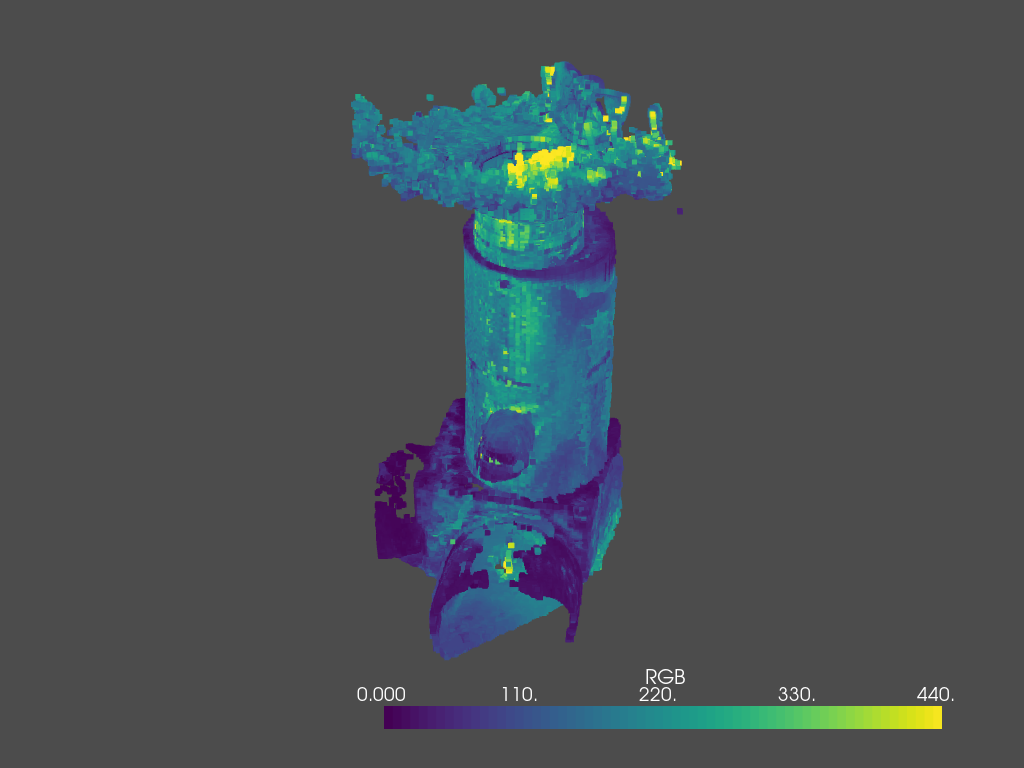

In [4]:
mesh = pv.read('2020-08-13_08_33_59.584_526_quick.ply')
mesh.plot(screenshot='sewer')

In [5]:
# Inspect how many cells are in this mesh
mesh.n_cells

123992

In [6]:
# Inspect how many points are in this mesh
mesh.n_points

123992

In [7]:
# What about scalar arrays? Are there any?
mesh.n_arrays

2

In [8]:
# What are the mesh bounds?
mesh.bounds

[-1.0038679838180542,
 1.1353607177734375,
 -1.1494855880737305,
 1.0881543159484863,
 -4.104009628295898,
 0.31039586663246155]

In [9]:
# Hm, where is the center of this mesh?
mesh.center

[0.06574636697769165, -0.03066563606262207, -1.8968068808317184]

In [10]:
the_pts = mesh.points

In [11]:
isinstance(the_pts, np.ndarray)

True

In [19]:
the_pts

pyvista_ndarray([[ 1.1234771 ,  0.19434224, -3.5004404 ],
                 [ 1.121653  ,  0.19524662, -3.4892042 ],
                 [ 1.122706  ,  0.19538581, -3.469235  ],
                 ...,
                 [-0.99797887, -0.42594537, -0.14802796],
                 [-0.99200094, -0.3353005 , -0.1436354 ],
                 [-1.003868  , -0.42634213, -0.14766589]], dtype=float32)

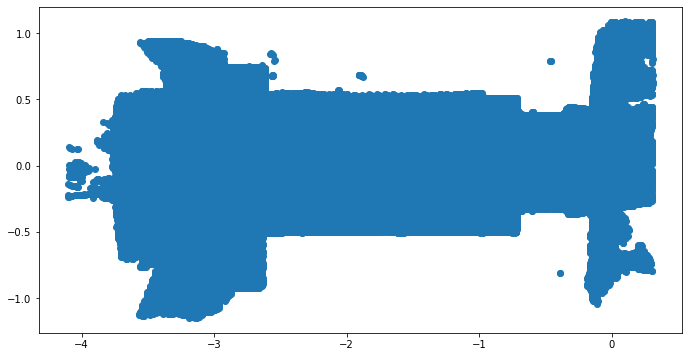

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(the_pts[:,2], mesh.points[:,1])   ###Plane XY
ax.set_aspect('equal')

In [ ]:
sized = mesh.compute_cell_sizes()
cell_volumes = sized.cell_arrays["Volume"]
volume = mesh.volume
threshed = mesh.threshold_percent([0.15, 0.50], invert=True)
threshed.plot(show_grid=True, cpos=[-2, 5, 3])

In [66]:
mesh1 = the_pts[:, 1]
mesh1

pyvista_ndarray([0.03721849, 0.0330014 , 0.03036323, ..., 0.25833976,
                 0.26531026, 0.28020033], dtype=float32)

In [67]:
ranges = np.array(model.bounds).reshape(-1, 2).ptp(axis=1)
point = np.array(model.center) - ranges*0.25

NameError: name 'model' is not defined

In [68]:
sized = mesh.compute_cell_sizes()

In [69]:
cell_volumes = sized.cell_arrays["Volume"]

In [70]:
volume = mesh.volume

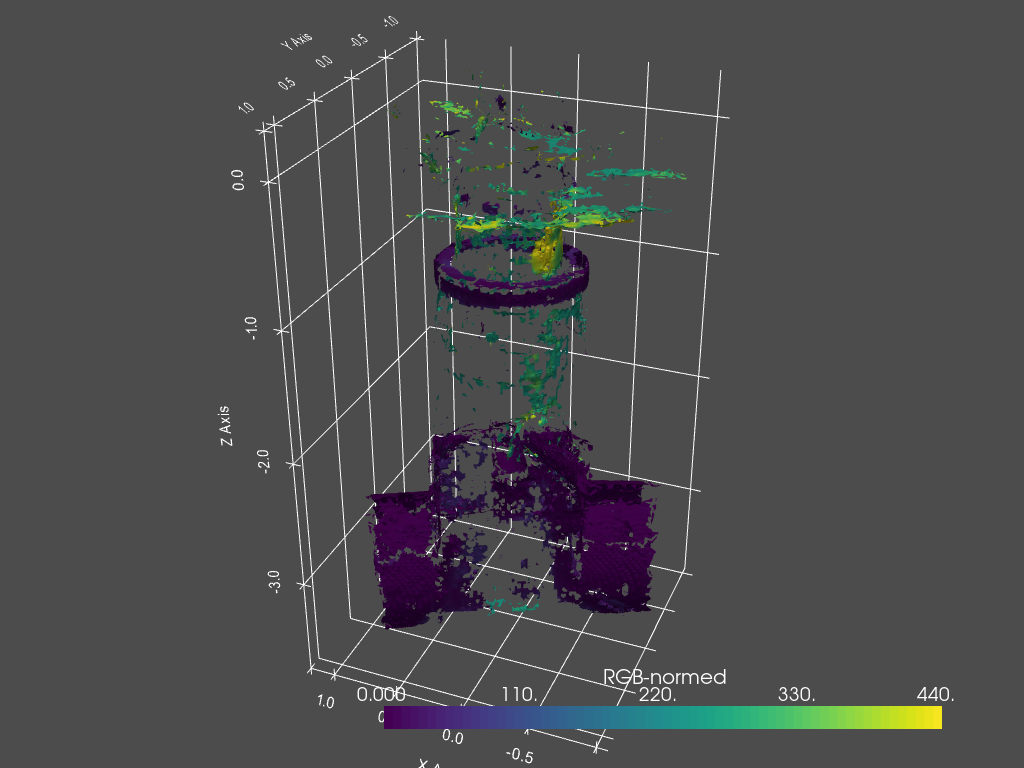

In [71]:
threshed = mesh.threshold_percent([0.15, 0.50], invert=True)
threshed.plot(show_grid=True, cpos=[-2, 5, 3])

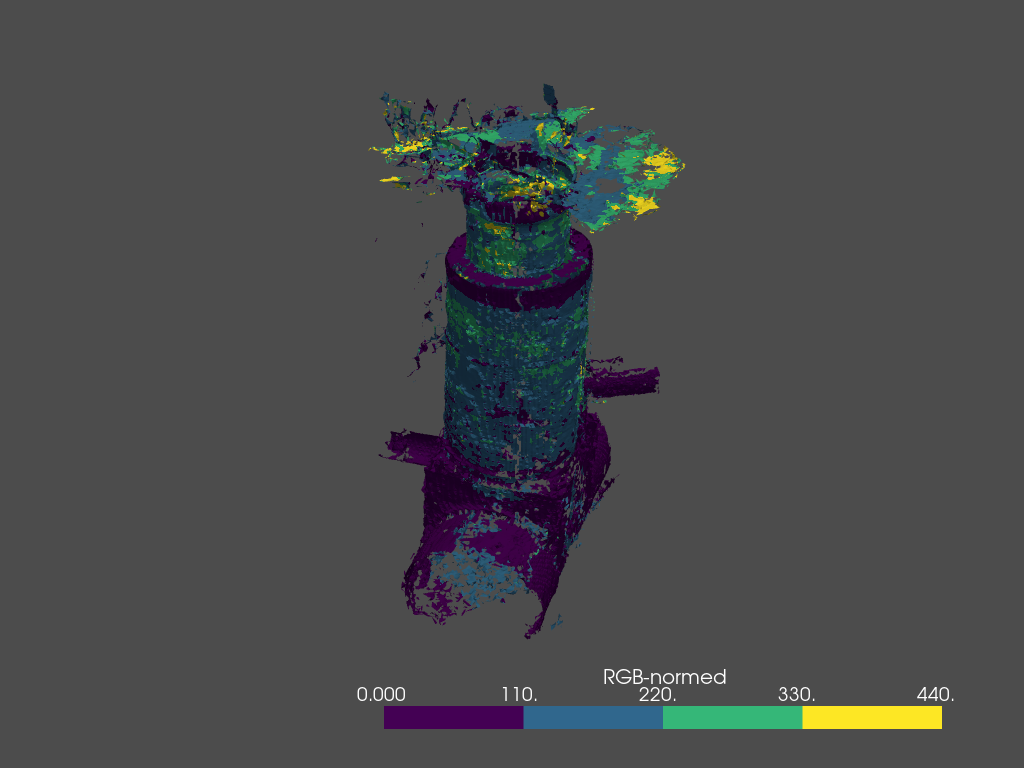

In [76]:
cmap = plt.cm.get_cmap("viridis", 4)
mesh.plot(cmap=cmap)

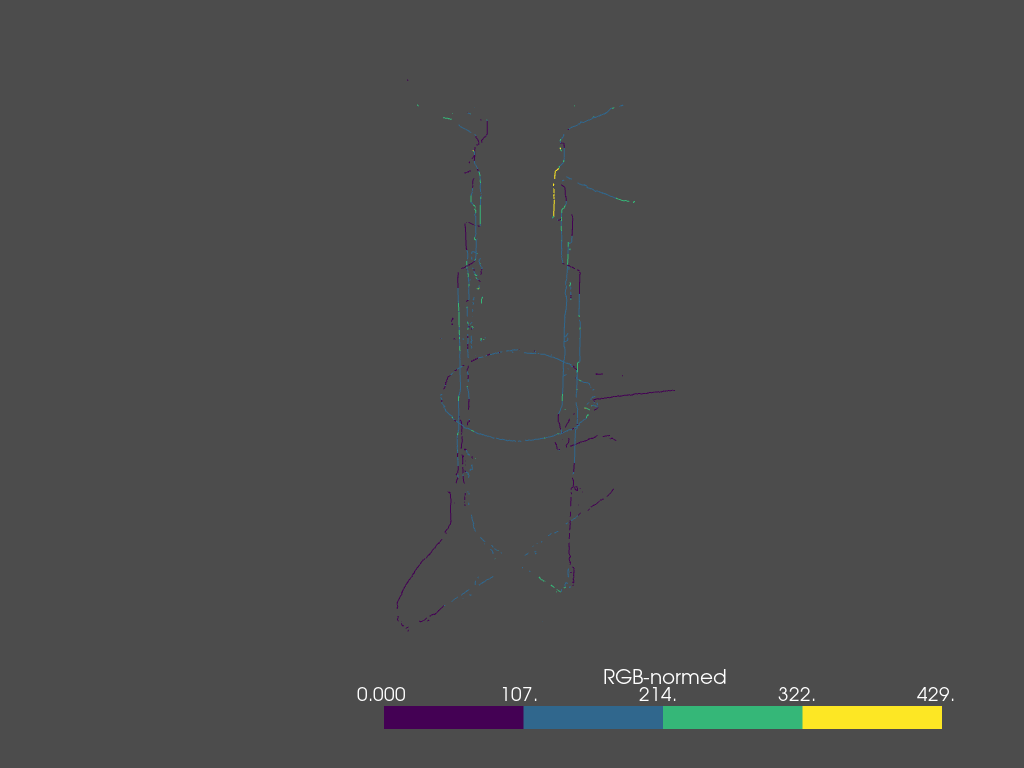

In [78]:
slices = mesh.slice_orthogonal()

slices.plot(cmap=cmap)

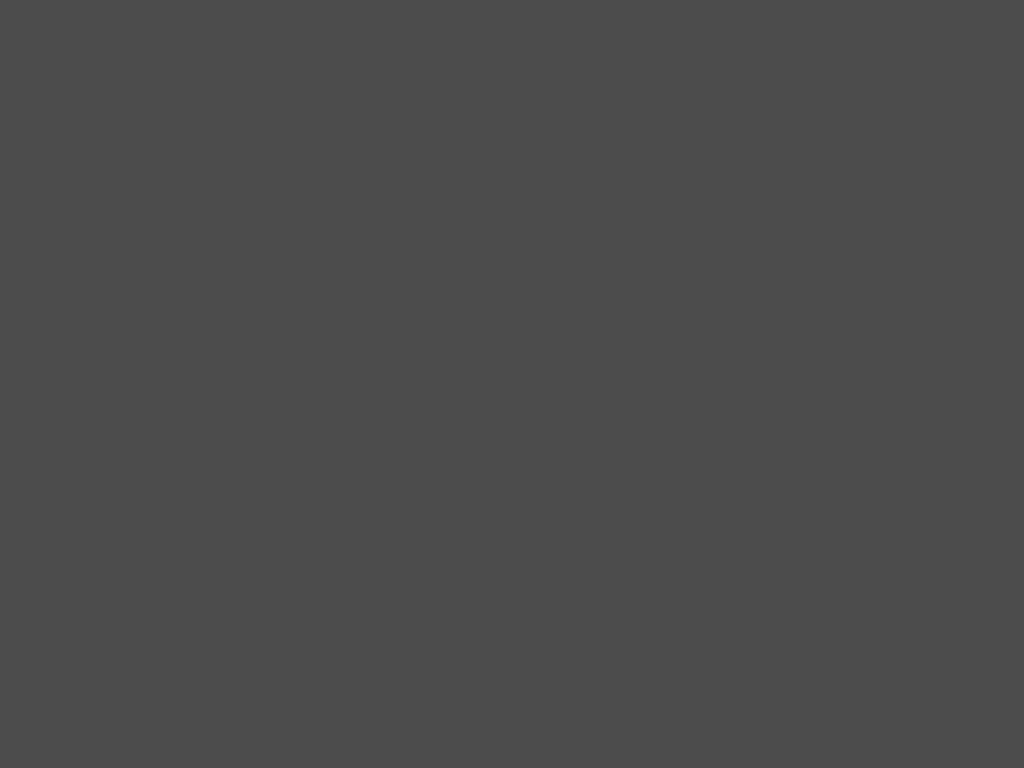

In [79]:
slices = mesh.slice_orthogonal(x=20, y=20, z=30)
slices.plot(cmap=cmap)

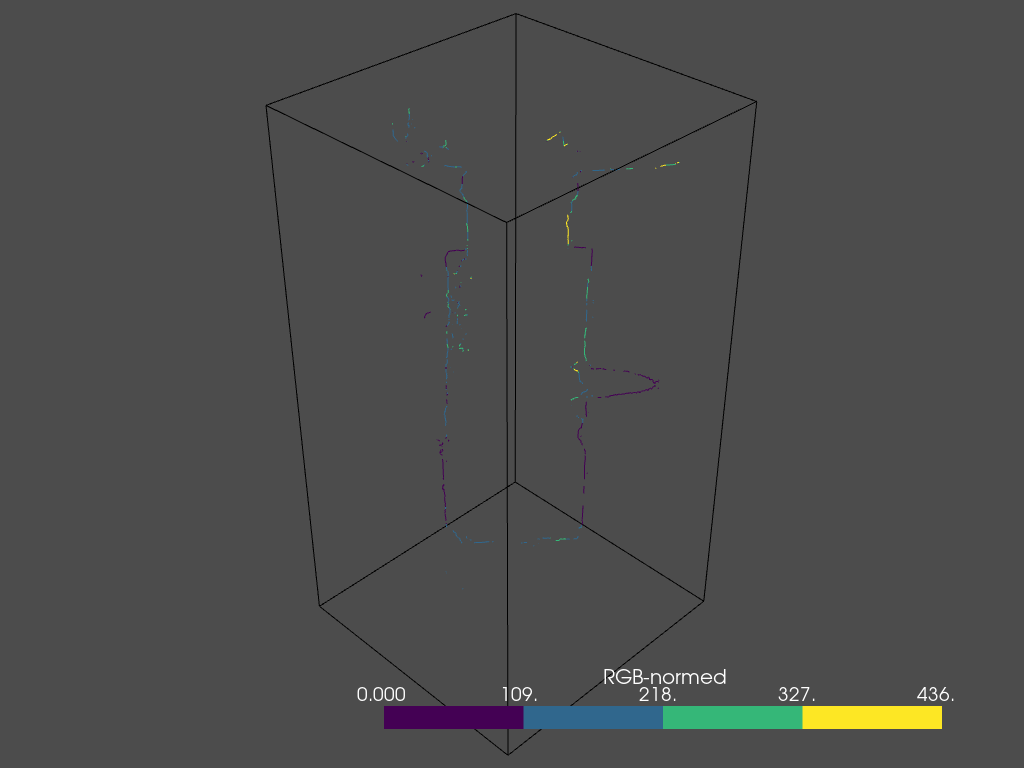

In [80]:
single_slice = mesh.slice(normal=[1, 1, 0])

p = pv.Plotter()
p.add_mesh(mesh.outline(), color="k")
p.add_mesh(single_slice, cmap=cmap)
p.show()

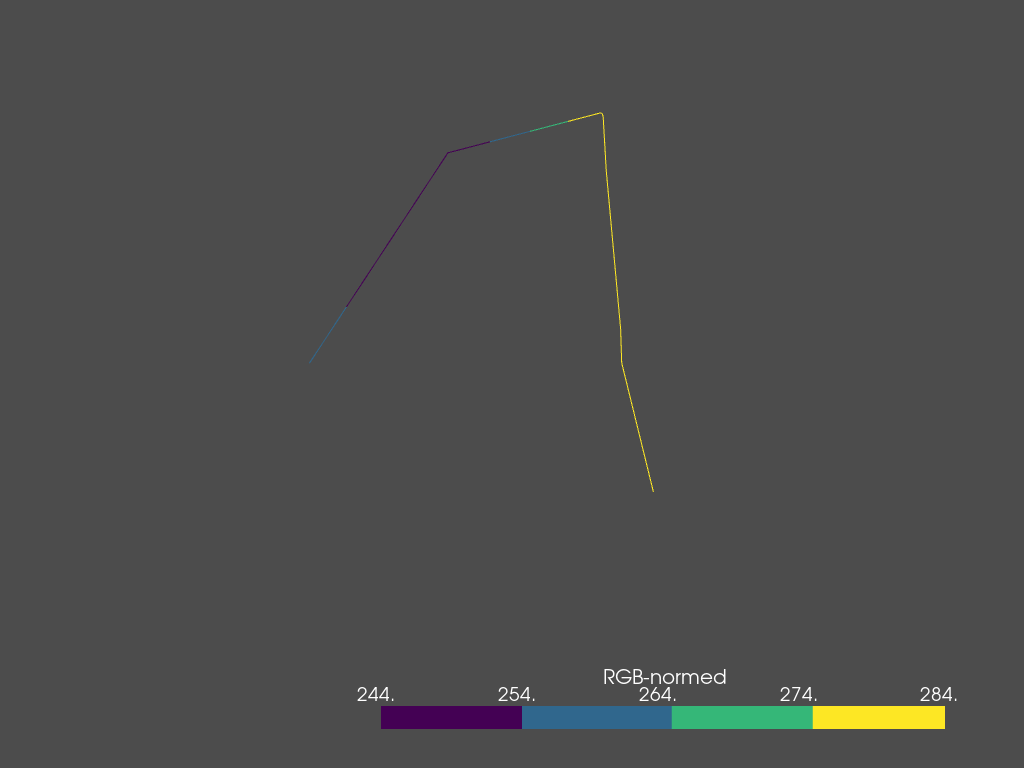

In [82]:
slices = mesh.slice_along_axis(n=1, axis="y")

slices.plot(cmap=cmap)